# 51. Validating complete Django form at once in django.

## Validation of Complete Django Form at once

## Validation of Complete Django Form at once


## forms.py :

## views.py :

# 52. Built in validators and custom validators in Django 

## Create Custom Form Validators :

## forms.py : imp !

# 53. Form Validation – Match Two field value

# 54. Styling Django Form Errors and Field Error in Django

# Field Error :

## forms.py :

## html :

# 55. save update and delete form data to/from database in Django .

## project's urls.py :

## app urls.py :

## views.py :

# note :

## imp imp imp imp !!!

In [ ]:
# for making the password hashed , so that admin can't see the password!

## models.py :

## admins.py :

## forms.py :

## app1.html :

## userinfo.html :

## success.html :

# 56. Model form in Django

## forms.py examples :

## forms.py examples :

## forms.py examples :

## forms.py examples :

# Model form :

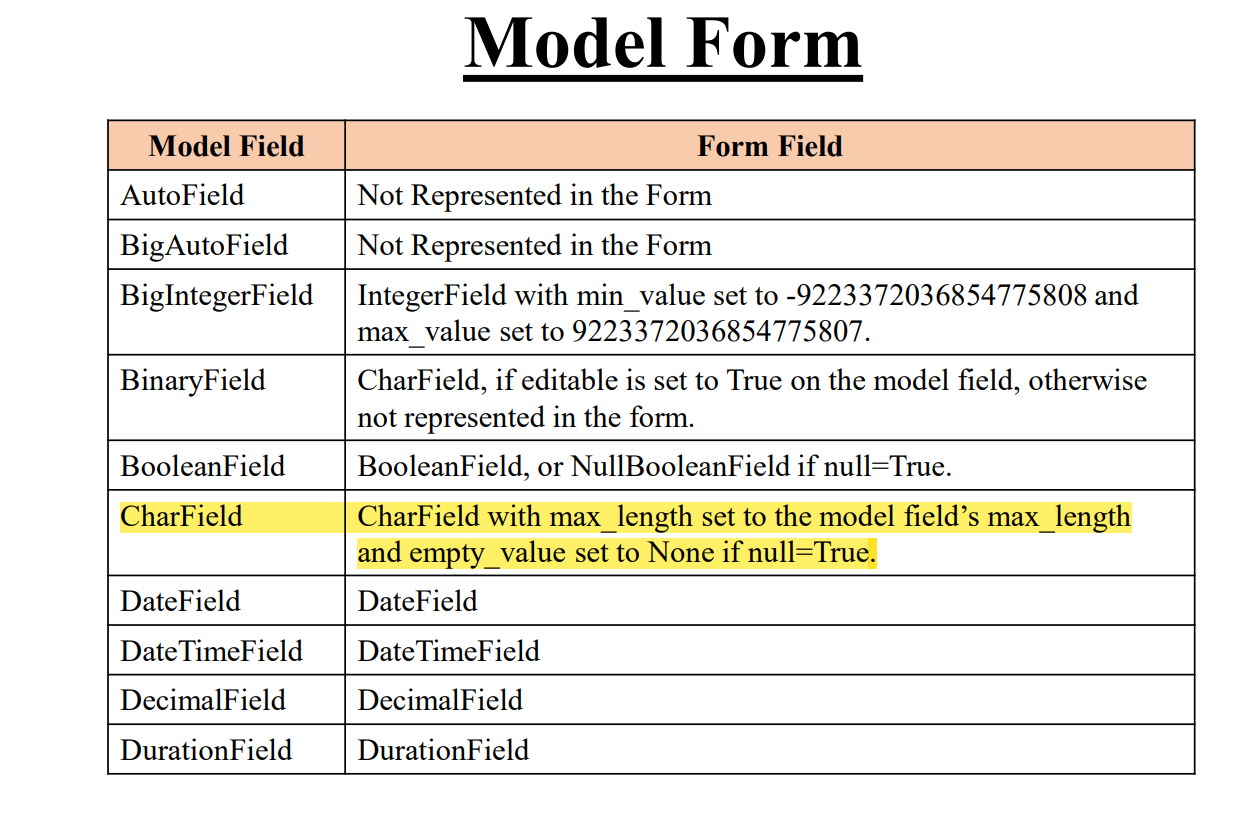

## example :

## Model Form :

# Model Form example  :

# Model Form example :

# save ( ) Method :

# code :

## forms.py :

In [ ]:
from django import forms
from django.forms import fields
from.models import mymodel

class myform(forms.ModelForm):                            # note : forms.ModelForm
    
    name=forms.CharField(max_length=32,min_length=10) 
    
    # this above defined validator will have more priority ( u can see the page source)
    
    class Meta:                                          # note : class Meta ( with capital M )
        
        model=mymodel
        
        fields=['name','roll','password']
        labels={'name':'enter your name ','roll':'enter your roll','password':'enter your password'}
        help_text={'name':'PLEASE enter your correct name !!'}
        error_messages={'name':{'required':'enter correct name ','max_length':20,'min_length':5}} 
        
        # this above validator will have less priority 
        
        widgets={
            'password':forms.PasswordInput,
            'name':forms.TextInput(attrs={'class':'myclass','placeholder':'your name '}),
            'roll':forms.TextInput(attrs={'class':'rollclass','placeholder':'roll num please'})
        }


# html code :

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
    <style>
        h1{
            color: white;
            text-shadow: 3px 3px 3px black;
        }
        .content{
            height: 70px;
            background-color: cadetblue;
            width: 100%;
            text-align: center;
            position: relative;
        }
    </style>
</head>

<body  >
    <div class="content"> <h1>fill the following data :</h1></div>
    <form action="" method="POST" novalidate >
        {% csrf_token %}
        {{key.as_p}}
        <input type="submit" value="submit">
        <hr>
    </form>
</body>

</html>

# 57. Dynamic url in Django

## Dynamic URL :

## Path Converters :

## Specifying defaults for view arguments :

## urls.py :

## views.py :

## Passing extra options to view functions :

# project's urls :

In [ ]:
"""dynamicurl URL Configuration

The `urlpatterns` list routes URLs to views. For more information please see:
    https://docs.djangoproject.com/en/3.2/topics/http/urls/
Examples:
Function views
    1. Add an import:  from my_app import views
    2. Add a URL to urlpatterns:  path('', views.home, name='home')
Class-based views
    1. Add an import:  from other_app.views import Home
    2. Add a URL to urlpatterns:  path('', Home.as_view(), name='home')
Including another URLconf
    1. Import the include() function: from django.urls import include, path
    2. Add a URL to urlpatterns:  path('blog/', include('blog.urls'))
"""
from django.contrib import admin
from django.urls import path
from app1 import views

urlpatterns = [
    path('admin/', admin.site.urls),
    path('',views.home,{'i_am_kwargs': 'i am kwargs passed from the url'},name="home"),
    path('student/<my_id>',views.myfunc,name="output"), # this <my_id> should be passed in the function too !!
    # also <my_id> holds the vlaue which is by default string !!

    path('student/<int:my_id>/<int:submy_id>/',views.mysub_id,name='subdetail'),
]             # also <int:my_id> holds the vlaue which is integer here !!




# views.py :

In [ ]:
from django.shortcuts import render

# Create your views here.

def home(request,i_am_kwargs):
    return render(request,'app1/home.html',{'key':i_am_kwargs})


# def myfunc(request,my_id):# this <my_id> get passed from urls.py file now can be used in the function which is  by default a string passed from the home.html
#     dictn={'key':my_id}
#     return render(request,'app1/output.html',dictn)


def myfunc(request,my_id):# this <my_id> get passed from urls.py file now can be used in the function which is  by default a string passed from the home.html
    if my_id =='1':
        dictn={'name':'pankaj','roll':1,'house_no': 128} 
    return render(request,'app1/output.html',dictn)


def mysub_id(request,my_id,submy_id=2):  # we can give some default value to 'submy_id'=2 if didn't get passed from urls.py file .
    if my_id==1 and submy_id==2 :
        dictn={'name': 'pankaj jii','roll':21}
        return render(request,'app1/output.html',dictn)




# home.html :

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=1, initial-scale=1.0">
    <title>Document</title>
    <style>
        body{
            background-color: grey;
        }
        h1{
            color: black;
        }
    </style>
</head>
<body>
    <h1> this is the home file </h1>
    {{key}} <br><br>
    <a href="{% url 'output' 1 %}">this is button which will take you to the output</a> 
    <!--  above "{% url 'output' 1 %}"> , here ( 1 ) is the <my_id> passed to the project's url file for url name 'output' -->
    <a href="{% url 'subdetail'  1 2 %}">for sub details</a>
</body>
</html>




# output.html :

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=1, initial-scale=1.0">
    <title>Document</title>
    <style>
        body{
            background-color: grey;
        }
        h1{
            color: black;
        }
    </style>
</head>
<body>
    <h1> this is the output file </h1>
    <h1>{{name}}</h1>
    <h1>{{roll}}</h1>
    <a href="{% url 'home'%}">way back to home</a>
    
</body>
</html>

# gs code :

## urls.py project :

## urls.py app :

## views.py :

# 58. custom path converters